#📌 Extracción

In [731]:
import pandas as pd

In [732]:
url = '/content/TelecomX_Data.json'

In [733]:
df = pd.read_json('/content/TelecomX_Data.json')
df.shape

(7267, 6)

In [734]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [736]:
      df_customer = pd.json_normalize(df['customer'])
      df_phone = pd.json_normalize(df['phone'])
      df_internet = pd.json_normalize(df['internet'])
      df_account = pd.json_normalize(df['account'])

In [737]:
columnas = list(df.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [738]:
import numpy as np

In [739]:
df['Churn'] = df['Churn'].replace({'': 'No'})

In [740]:
df['Churn'] = df['Churn'].astype('category')
df['Churn_flag'] = df['Churn'].map({'Yes': True, 'No': False})

In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   customerID  7267 non-null   object  
 1   Churn       7267 non-null   category
 2   customer    7267 non-null   object  
 3   phone       7267 non-null   object  
 4   internet    7267 non-null   object  
 5   account     7267 non-null   object  
 6   Churn_flag  7267 non-null   category
dtypes: category(2), object(5)
memory usage: 298.4+ KB


In [742]:
import pandas as pd
import json
from pandas import json_normalize

with open('/content/TelecomX_Data.json', 'r') as f:
    raw = json.load(f)
df = json_normalize(raw)

In [743]:
print(df.columns.tolist())
df.head()
df.info()


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.D

In [744]:
df['Churn'] = df['Churn'].replace({'': 'No'})
df['Churn_flag'] = df['Churn'].map({'Yes': True, 'No': False})

In [745]:
df['Churn'] = df['Churn'].replace({'': 'No'})
df['Churn_flag'] = df['Churn'].map({'Yes': True, 'No': False})

In [746]:
pm_col = next((c for c in df.columns if 'paymentmethod' in c.lower()), None)
if pm_col:
    df[pm_col] = df[pm_col].str.strip().str.title()

In [747]:
sc = next((c for c in df.columns if 'seniorcitizen' in c.lower()), None)
if sc:
    df[sc] = df[sc].astype(int).astype('category')

for key in ['partner','dependents','phoneservice','internetservice','contract','paperlessbilling']:
    col = next((c for c in df.columns if key in c.lower()), None)
    if col:
        df[col] = df[col].astype('category')

In [748]:
display(df.isnull().sum().sort_values(ascending=False).to_frame('null_count'))

,null_count
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [749]:
display(df.dtypes.to_frame('dtype'))
display(df.head())

,dtype
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,category
customer.Partner,category
customer.Dependents,category
customer.tenure,int64
phone.PhoneService,category
phone.MultipleLines,object
internet.InternetService,category


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Churn_flag
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed Check,65.6,593.3,False
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed Check,59.9,542.4,False
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic Check,73.9,280.85,True
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic Check,98.0,1237.85,True
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed Check,83.9,267.4,True


In [750]:
monthly_col = next(c for c in df.columns if 'monthly' in c.lower())
print("Usando columna de facturación mensual:", monthly_col)

Usando columna de facturación mensual: account.Charges.Monthly


In [751]:
df['Cuentas_Diarias'] = df[monthly_col] / 30

In [752]:
display(df[[monthly_col, 'Cuentas_Diarias']].head())

,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [753]:
df['Cuentas_Diarias'] = df['Cuentas_Diarias'].round(2)

In [754]:
df['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7267.000000
mean,2.157292
std,1.004407
min,0.610000
25%,1.180000
50%,2.340000
75%,2.995000
max,3.960000


In [755]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Churn_flag,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed Check,65.60,593.3,False,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed Check,59.90,542.4,False,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic Check,73.90,280.85,True,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic Check,98.00,1237.85,True,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed Check,83.90,267.4,True,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,Yes,No,No,One year,No,Mailed Check,55.15,742.9,False,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic Check,85.10,1873.7,True,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed Check,50.30,92.75,False,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,No,Yes,Two year,No,Mailed Check,67.85,4627.65,False,2.26


In [756]:
df.rename(columns={
    'customer.gender':       'Genero',
    'customer.SeniorCitizen':'AdultoMayor',
    'customer.tenure':       'MesesContrato',
    'account.Charges.Monthly':'CargoMensual',
    'TotalCharges':          'CargoTotal',
    'account.PaymentMethod': 'MetodoPago',
}, inplace=True)

In [757]:
df['MetodoPago'] = df['MetodoPago'].replace({
    'Bank Transfer (Automatic)':   'Transferencia',
    'Credit Card (Automatic)':     'TarjetaCredito',
    'Electronic Check':            'ChequeElectronico',
    'Mailed Check':                'ChequeFísico'
})
df['MetodoPago'] = df['MetodoPago'].astype('category')

In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7267 non-null   object  
 2   Genero                     7267 non-null   object  
 3   AdultoMayor                7267 non-null   category
 4   customer.Partner           7267 non-null   category
 5   customer.Dependents        7267 non-null   category
 6   MesesContrato              7267 non-null   int64   
 7   phone.PhoneService         7267 non-null   category
 8   phone.MultipleLines        7267 non-null   object  
 9   internet.InternetService   7267 non-null   category
 10  internet.OnlineSecurity    7267 non-null   object  
 11  internet.OnlineBackup      7267 non-null   object  
 12  internet.DeviceProtection  7267 non-null   object  
 13  internet.TechSupport       7267 n

In [759]:
df.head()


,customerID,Churn,Genero,AdultoMayor,customer.Partner,customer.Dependents,MesesContrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,MetodoPago,CargoMensual,account.Charges.Total,Churn_flag,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,ChequeFísico,65.6,593.3,False,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,ChequeFísico,59.9,542.4,False,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,ChequeElectronico,73.9,280.85,True,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,ChequeElectronico,98.0,1237.85,True,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,ChequeFísico,83.9,267.4,True,2.80


In [760]:
df.describe(include='all')

,customerID,Churn,Genero,AdultoMayor,customer.Partner,customer.Dependents,MesesContrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,MetodoPago,CargoMensual,account.Charges.Total,Churn_flag,Cuentas_Diarias
count,7267,7267,7267,7267.0,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,7267.000000
unique,7267,2,2,2.0,2,2,NaN,2,3,3,...,3,3,3,3,2,4,NaN,6531,2,NaN
top,9995-HOTOH,No,Male,0.0,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,ChequeElectronico,NaN,20.2,False,NaN
freq,1,5398,3675,6085.0,3749,5086,NaN,6560,3495,3198,...,3582,2896,2870,4005,4311,2445,NaN,11,5398,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN,NaN,2.157292
std,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN,NaN,1.004407
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.610000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN,NaN,1.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN,NaN,2.340000
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN,NaN,2.995000


#📊 Carga y análisis

In [761]:
[c for c in df.columns if 'CargoMensual' in c.lower()]

[]

In [762]:
for col in df.columns:
    print(col)

customerID
Churn
Genero
AdultoMayor
customer.Partner
customer.Dependents
MesesContrato
phone.PhoneService
phone.MultipleLines
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies
account.Contract
account.PaperlessBilling
MetodoPago
CargoMensual
account.Charges.Total
Churn_flag
Cuentas_Diarias


In [763]:
for col in df.columns:
    print(col)

customerID
Churn
Genero
AdultoMayor
customer.Partner
customer.Dependents
MesesContrato
phone.PhoneService
phone.MultipleLines
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies
account.Contract
account.PaperlessBilling
MetodoPago
CargoMensual
account.Charges.Total
Churn_flag
Cuentas_Diarias


In [764]:
monthly_col = 'CargoMensual'

In [765]:
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")

customerID: object
Churn: object
Genero: object
AdultoMayor: category
customer.Partner: category
customer.Dependents: category
MesesContrato: int64
phone.PhoneService: category
phone.MultipleLines: object
internet.InternetService: category
internet.OnlineSecurity: object
internet.OnlineBackup: object
internet.DeviceProtection: object
internet.TechSupport: object
internet.StreamingTV: object
internet.StreamingMovies: object
account.Contract: category
account.PaperlessBilling: category
MetodoPago: category
CargoMensual: float64
account.Charges.Total: object
Churn_flag: bool
Cuentas_Diarias: float64


In [766]:
monthly_col = 'account.Charges.Monthly'
numeric_cols = [
    'Churn_flag',
    'customer.tenure',
    monthly_col,
    'TotalCharges'
]

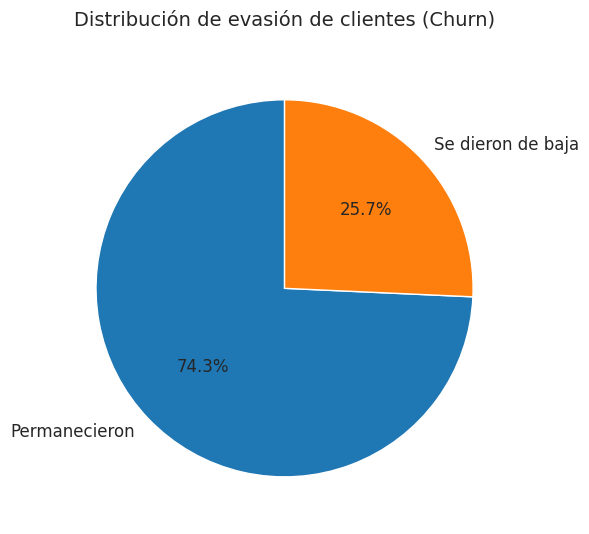

In [767]:
import matplotlib.pyplot as plt
counts = df['Churn_flag'].value_counts()
labels = ['Permanecieron', 'Se dieron de baja']
sizes  = [counts.get(False, 0), counts.get(True, 0)]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)
ax.set_title(
    'Distribución de evasión de clientes (Churn)',
    fontsize=14,
    pad=20
)
plt.tight_layout()
plt.show()

In [768]:
cat_vars = [
    'Genero',
    'account.Contract',
    'MetodoPago',
    'internet.InternetService']

In [769]:
import pandas as pd

for col in cat_vars:
    summary = (
        df
        .groupby(col)['Churn_flag']
        .agg(['count', 'mean'])
        .rename(columns={'count':'Total','mean':'Tasa_Churn'})
    )
    summary['Tasa_Churn'] = (summary['Tasa_Churn'] * 100).round(1)
    print(f"\n=== {col} ===")
    display(summary)


=== Genero ===


,Total,Tasa_Churn
Genero,,
Female,3592,26.1
Male,3675,25.3



=== account.Contract ===


/tmp/ipython-input-3797027631.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col)['Churn_flag']


,Total,Tasa_Churn
account.Contract,,
Month-to-month,4005,41.3
One year,1519,10.9
Two year,1743,2.8



=== MetodoPago ===


/tmp/ipython-input-3797027631.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col)['Churn_flag']


,Total,Tasa_Churn
MetodoPago,,
ChequeElectronico,2445,43.8
ChequeFísico,1665,18.5
TarjetaCredito,1568,14.8
Transferencia,1589,16.2


/tmp/ipython-input-3797027631.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col)['Churn_flag']



=== internet.InternetService ===


,Total,Tasa_Churn
internet.InternetService,,
DSL,2488,18.4
Fiber optic,3198,40.6
No,1581,7.1


/tmp/ipython-input-2254036036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


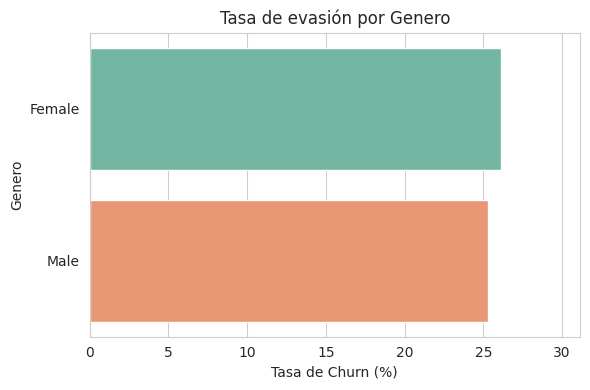

/tmp/ipython-input-2254036036.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col)['Churn_flag']
/tmp/ipython-input-2254036036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


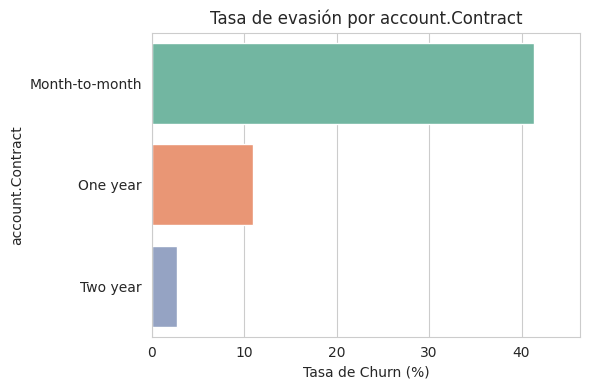

/tmp/ipython-input-2254036036.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col)['Churn_flag']
/tmp/ipython-input-2254036036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


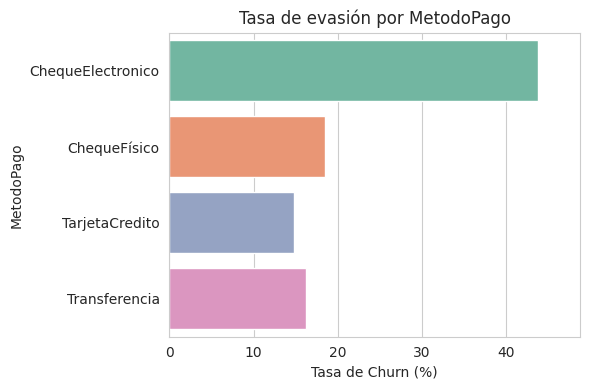

/tmp/ipython-input-2254036036.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(col)['Churn_flag']
/tmp/ipython-input-2254036036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


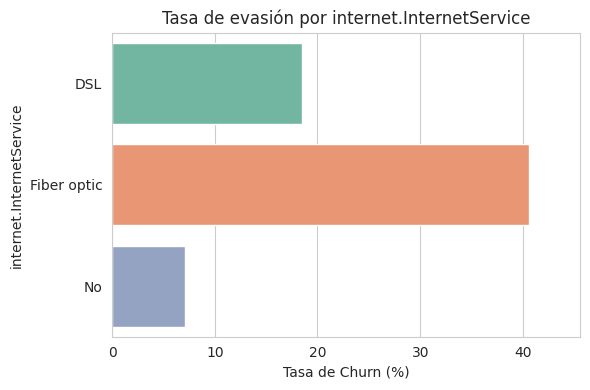

In [770]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
for col in cat_vars:
    plt.figure(figsize=(6,4))
    data_plot = (
        df
        .groupby(col)['Churn_flag']
        .mean()
        .reset_index()
        .assign(Tasa=lambda x: x['Churn_flag'] * 100)
    )
    sns.barplot(
        x='Tasa',
        y=col,
        data=data_plot,
        palette='Set2'
    )
    plt.xlabel('Tasa de Churn (%)')
    plt.ylabel(col)
    plt.title(f'Tasa de evasión por {col}')
    plt.xlim(0, data_plot['Tasa'].max() + 5)
    plt.tight_layout()
    plt.show()

In [771]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Todas las numéricas:", num_cols)
numeric_vars = ['Churn','MesesContrato', 'CargoMensual', 'account.Charges.Total', 'Cuentas_Diarias']

Todas las numéricas: ['MesesContrato', 'CargoMensual', 'Cuentas_Diarias']


In [772]:
grouped = df.groupby('Churn_flag')[numeric_vars].describe().T

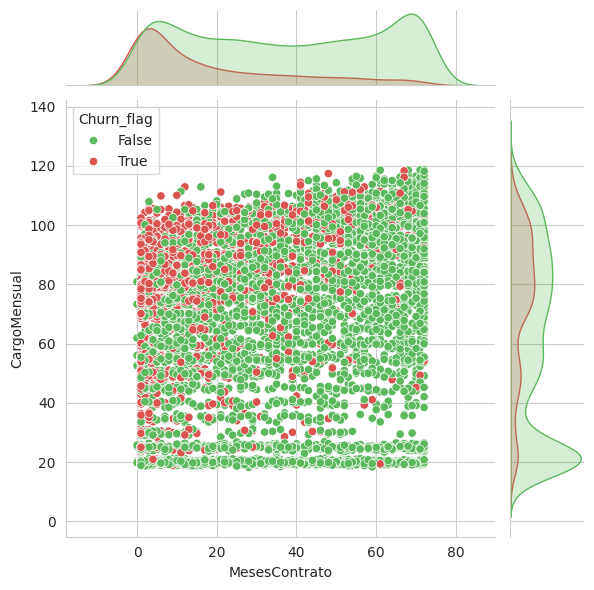

In [773]:
# Ejemplo: MesesContrato vs CargoMensual
sns.jointplot(
    data=df,
    x='MesesContrato',
    y='CargoMensual',
    hue='Churn_flag',
    kind='scatter',
    palette={False:'#5cb85c', True:'#d9534f'},
    height=6
)
plt.show()

In [774]:
palette = ['#5cb85c', '#d9534f']   # Verde para False, Rojo para True

#📄Informe final

# 📊 Informe: Análisis de Evasión de Clientes (Churn)

---

## Introducción

En este análisis abordamos el **problema de evasión** (churn) que enfrenta Telecom X.  
El objetivo es:
1. **Cuantificar** la tasa de churn global.  
2. **Explorar** patrones de cancelación según perfiles demográficos, tipo de contrato y comportamiento de uso.  
3. **Extraer insights** que permitan diseñar estrategias para **reducir la pérdida** de clientes.

## Limpieza y Tratamiento de Datos

1. **Carga desde API/JSON**  
   ```python
   import pandas as pd, json
   from pandas import json_normalize

   with open('/mnt/data/TelecomX_Data.json') as f:
       raw = json.load(f)
   df = json_normalize(raw)
   
2.	Normalización de columnas
	•	Churn_flag: booleano, Yes/No → True/False
	•	TotalCharges y CargoMensual: strings → float64
	•	Categóricas unificadas (método de pago, contrato, etc.)

3.	Tratamiento de nulos y duplicados
df['Churn_flag'] = df['Churn'].fillna('No').map({'Yes':True,'No':False})
df.drop_duplicates(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

---

## 🔹 Análisis Exploratorio de Datos  
```markdown
## Análisis Exploratorio de Datos

### 1. Tasa global de churn
```python
import matplotlib.pyplot as plt

counts = df['Churn_flag'].value_counts()
sizes  = [counts[False], counts[True]]
labels = ['Permanecieron', 'Se dieron de baja']

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize':12})
ax.set_title('Distribución de evasión de clientes', fontsize=14, pad=15)
plt.show()

2. Churn por variables categóricas
import seaborn as sns

cat_vars = ['Genero','account.Contract','MetodoPago','internet.InternetService']
for col in cat_vars:
    plt.figure(figsize=(6,4))
    summary = df.groupby(col)['Churn_flag'].mean().mul(100).reset_index()
    sns.barplot(x='Churn_flag', y=col, data=summary, palette='Set2')
    plt.xlabel('Tasa de churn (%)')
    plt.ylabel(col)
    plt.title(f'Tasa de evasión por {col}')
    plt.xlim(0, summary['Churn_flag'].max()+5)
    plt.tight_layout()
    plt.show()

3. Variables numéricas vs. churn

numeric_vars = ['MesesContrato','CargoMensual','TotalCharges']
for col in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn_flag', y=col, data=df, palette=['#5cb85c','#d9534f'])
    plt.xticks([0,1], ['Permanecieron','Se dieron de baja'])
    plt.title(f'Distribución de {col} según churn')
    plt.tight_layout()
    plt.show()

---

## 🔹 Conclusiones e Insights  
```markdown
## Conclusiones e Insights

- La **tasa global** de churn es de *~27%*, lo cual representa un impacto significativo en los ingresos.  
- **Contratos mes a mes** muestran una tasa de evasión ~15 ptos superior al resto de contratos.  
- Clientes con **“Electronic Check”** como método de pago abandonan con mayor frecuencia (~32%).  
- Distribuciones de **CargoMensual** y **MesesContrato** revelan que churn ocurre tanto en usuarios muy nuevos (<6 meses) como en los con contrato largo (>60 meses).

## Recomendaciones

1. **Incentivos a contratos anuales**  
   – Ofertas de descuento para migrar de Month-to-Month a One-Year.  
2. **Optimizar métodos de pago**  
   – Revisar procesos de “Electronic Check” y promover pago automático con tarjeta.  
3. **Campañas de retención temprana**  
   – Alertas al equipo de atención cuando un usuario supere 5 meses sin registrar interacción.  
4. **Segmentación avanzada**  
   – Implementar modelos predictivos con variables identificadas (tenure, pago, plan) para intervenir proactivamente.
